# 2 Top-selling suppliers


In [1]:
# required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [8]:
# read the enriched dataset
df0 = pd.read_csv('dataset_e3.csv')

In [9]:
df0.head(3)

,usuario,categorias,numero_articulos,fecha,precio,valoracion,comentarios,proveedores,ciudad
0,1,Cocina,2,Otoño,112.28,2.7,me gusto,Flora,Valladolid
1,1,Baño,6,Verano,479.51,1.7,la calidad no es la esperada,Don limpio,Valladolid
2,1,Baño,6,Primavera,459.00,4.8,justo lo que esperaba,Cristasol,Valladolid


In [15]:
# copy of df0
df1 = df0.copy()

In [16]:
# select the attributes required for analysis
df2 = df1[ [ 'fecha', 'precio', 'ciudad', 'proveedores' ] ]

In [23]:
# rename attributes
df3 = df2.rename( columns= {
                'fecha': 'season', 
                'precio': 'price', 
                'ciudad': 'city', 
                'proveedores': 'suppliers'
                   } )

In [24]:
df3.head(3)

,season,price,city,suppliers
0,Otoño,112.28,Valladolid,Flora
1,Verano,479.51,Valladolid,Don limpio
2,Primavera,459.00,Valladolid,Cristasol


In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   season     10000 non-null  object 
 1   price      10000 non-null  float64
 2   city       10000 non-null  object 
 3   suppliers  10000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 648.7+ KB


In [28]:
# top-selling suppliers 
suppliers = df3.groupby( ['suppliers'] ).sum()

In [32]:
suppliers.head(3)

,price
suppliers,
Michael Kors,59431.89
3M,51767.98
Adidas,55116.14


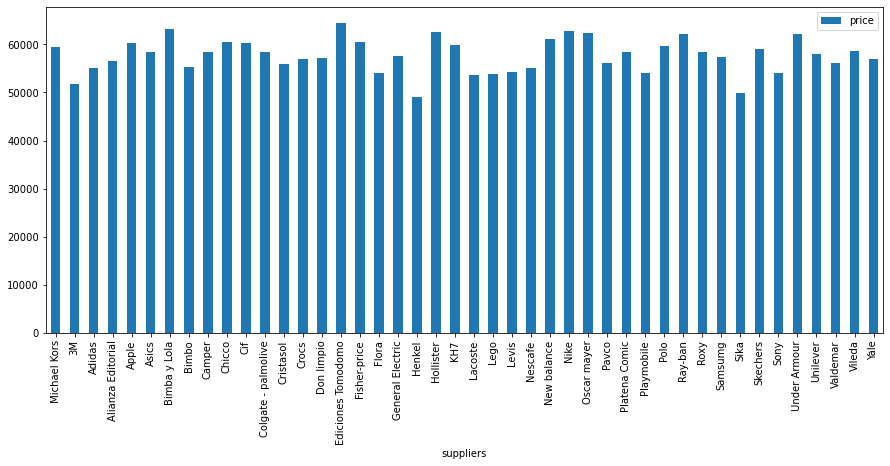

In [47]:
# graph top-selling suppliers
suppliers.plot.bar( figsize=(15,6) );

In [39]:
suppliers.shape

(44, 1)

In [36]:
# Sort suppliers by price
suppliers_sort = suppliers.sort_values(by='price', ascending=False)

In [37]:
suppliers_sort.head(3)

,price
suppliers,
Ediciones Tomodomo,64527.51
Bimba y Lola,63128.19
Nike,62727.44


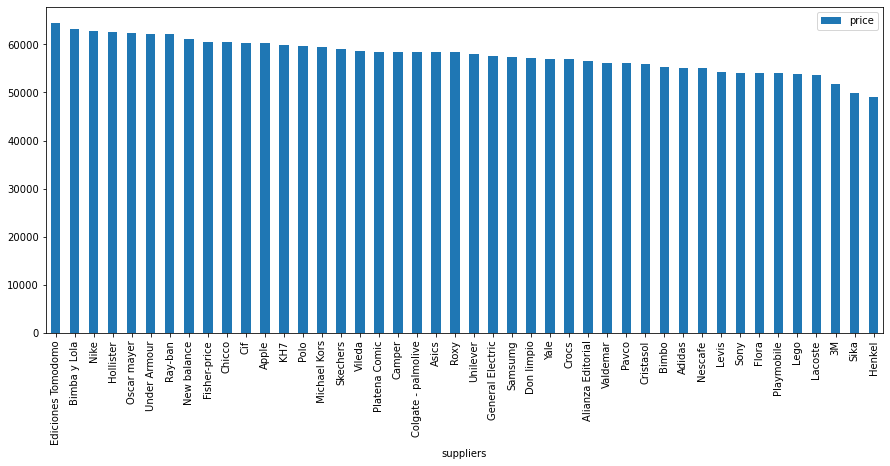

In [38]:
# graph top-selling suppliers
suppliers_sort.plot.bar( figsize=(15,6) );

In [45]:
# suppliers by season
# pd.pivot_table(data=df6, index=['ciudad'], values='precio', columns=['fecha'], aggfunc=np.sum)
df4 = pd.pivot_table( data=df3, index=['suppliers'], values='price', columns=['season'], aggfunc=np.sum )

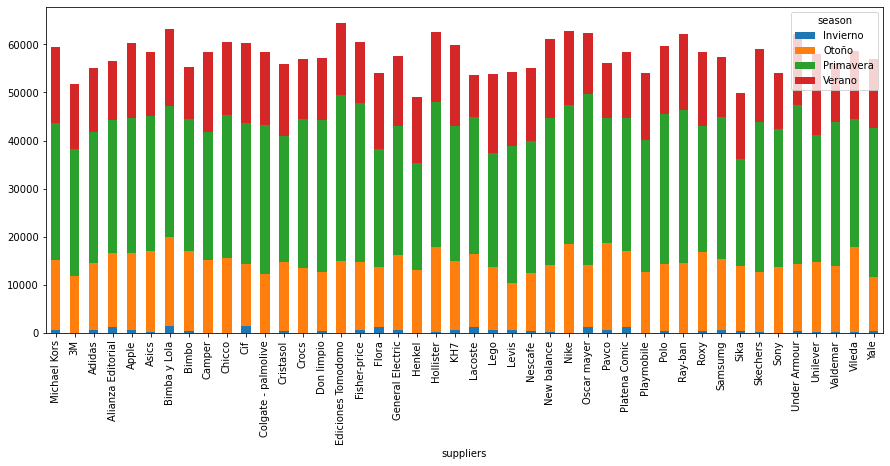

In [46]:
# graphs
df4.plot.bar(stacked=True, figsize=(15, 6))